In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#read in data
properties2016 = pd.read_csv("properties_2016.csv",header = 0)
# properties2016.head(10)
properties2017 = pd.read_csv("properties_2017.csv",header = 0)
# properties2017.head(10)

/Users/zhengzeng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/zhengzeng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,4.0,NaN,NaN,...,1.0,NaN,179072.0,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,103553.0,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,4.0,NaN,NaN,...,1.0,NaN,221771.0,265184.0,2016.0,43413.0,4054.76,NaN,NaN,NaN


In [6]:
#analyze the data structure
#total number of entries
entry_count = properties2016.count()
print("=====================")
#percentage of nan value
print(properties2016.isna().sum()/entry_count)
print("=====================")
print(properties2016.isnull().sum()/entry_count)
#sum properties have larger than 100 percentage null or na values
#decide to cut those columns entirely because they are all empty

int64
parcelid                           0.000000
airconditioningtypeid              2.678555
architecturalstyletypeid         491.528791
basementsqft                    1832.671376
bathroomcnt                        0.003854
bedroomcnt                         0.003850
buildingclasstypeid              235.377940
buildingqualitytypeid              0.539972
calculatedbathnbr                  0.045132
decktypeid                       173.614939
finishedfloor1squarefeet          13.726032
calculatedfinishedsquarefeet       0.018966
finishedsquarefeet12               0.101888
finishedsquarefeet13             388.105448
finishedsquarefeet15              14.645955
finishedsquarefeet50              13.726032
finishedsquarefeet6              134.685514
fips                               0.003846
fireplacecnt                       8.548508
fullbathcnt                        0.045132
garagecarcnt                       2.379745
garagetotalsqft                    2.379745
hashottuborspa            

In [7]:
#cut out columns that have no values
def cutMissingColumns(df):
    idx = df.isna().sum()/df.count()<0.5
    cutdf= df[df.columns[idx]]
    return cutdf

prop2016 = cutMissingColumns(properties2016)
prop2017 = cutMissingColumns(properties2017)
print(prop2016.info())
print(prop2017.info()) #they are the same, can build on same models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bathroomcnt                   float64
 2   bedroomcnt                    float64
 3   calculatedbathnbr             float64
 4   calculatedfinishedsquarefeet  float64
 5   finishedsquarefeet12          float64
 6   fips                          float64
 7   fullbathcnt                   float64
 8   latitude                      float64
 9   longitude                     float64
 10  lotsizesquarefeet             float64
 11  propertycountylandusecode     object 
 12  propertylandusetypeid         float64
 13  rawcensustractandblock        float64
 14  regionidcity                  float64
 15  regionidcounty                float64
 16  regionidzip                   float64
 17  roomcnt                       float64
 18  yearbuilt             

In [12]:
#load the response values
train2016 = pd.read_csv("train_2016.csv",header= 0)
train2017 = pd.read_csv("train_2017.csv",header = 0)
train2016.head(10)
# train2016.info()

,logerror,transactiondate
parcelid,,
10711738,1,1
10711755,1,1
10711805,1,1
10711816,1,1
10711858,1,1
...,...,...
162960704,1,1
162960769,1,1
162960801,1,1


In [119]:
from sklearn.preprocessing import scale,normalize
#data combination and cleaning
combined_2016  = train2016.merge(prop2016,on = "parcelid",how = "left")
combined_2016.head(20)
#select features for models

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.hist(imputed_trainx.roomcnt.values, bins= [
    x for x in range(10)
])
plt.title("room count")
plt.subplot(1,3,2)
plt.hist(imputed_trainx.bathroomcnt.values,bins = [
    x for x in range(10)
])
plt.title("bathroom count")
plt.subplot(1,3,3)
plt.hist(imputed_trainx.structuretaxvaluedollarcnt/max(imputed_trainx.structuretaxvaluedollarcnt),range = [0,0.175])
plt.ylim((0,80000))
plt.title("struct. tax value")
plt.show()

#numeric data cleaning
train_col = []
for c in combined_2016.columns:
    if combined_2016[c].dtype ==np.float64:
        train_col.append(c)
trainx = combined_2016[train_col]
trainx['roomcnt'][trainx['roomcnt'] ==0] = np.nan;
trainx['lat'] = trainx['latitude']/1000000;
trainx['lon'] = abs(trainx['longitude']/1000000);
# trainx['rg_county_id'] = trainx['regionidcounty'].astype("string")
# trainx['rg_zip_id'] = trainx['regionidzip'].astype("string")
# censustractandblock, structuretaxvaluedollarcnt, landtaxvaluedollarcnt and taxvaluedollarcnt are large numbers.
scale(trainx[['censustractandblock', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt']],copy = False)
#lat and longitude should be rectified.
# trainx.info()
trimed_trainx = trainx.drop(columns = ['regionidcounty','regionidcity','regionidzip','latitude','longitude'],axis= 1)
# trimed_trainx.info()

trimed_trainx.head()



/Users/zhengzeng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-119-dd4b86f4a494>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx['lat'] = trainx['latitude']/1000000;
<ipython-input-119-dd4b86f4a494>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,logerror,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusetypeid,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,lat,lon
0,0.0276,2.0,3.0,2.0,1684.0,1684.0,6037.0,2.0,7528.0,261.0,...,NaN,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13,34.280990,118.488536
1,-0.1684,3.5,4.0,3.5,2263.0,2263.0,6059.0,3.0,3643.0,261.0,...,NaN,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,33.668120,117.677556
2,-0.0040,3.0,2.0,3.0,2217.0,2217.0,6037.0,3.0,11423.0,261.0,...,NaN,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13,34.136312,118.175032
3,0.0218,2.0,2.0,2.0,839.0,839.0,6037.0,2.0,70859.0,266.0,...,NaN,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13,33.755800,118.309000
4,-0.0050,2.5,4.0,2.5,2283.0,2283.0,6059.0,2.0,6000.0,261.0,...,8.0,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13,33.485643,117.700234


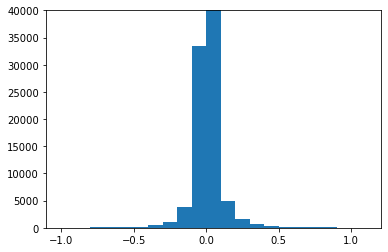

In [83]:
#visualize some of the variables
plt.hist(trimed_trainx.logerror.values, bins=[
    float(x)/ 10 for x in list(range(-10, 12, 1))
])
plt.ylim((0,40000))
plt.show()


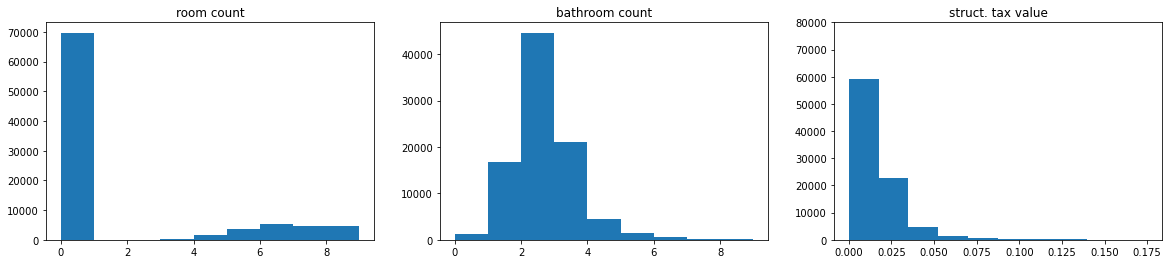

In [92]:
#check some of the fields in the data
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.hist(trimed_trainx.roomcnt.values, bins= [
    x for x in range(10)
])
plt.title("room count")
plt.subplot(1,3,2)
plt.hist(trimed_trainx.bathroomcnt.values,bins = [
    x for x in range(10)
])
plt.title("bathroom count")
plt.subplot(1,3,3)
plt.hist(trimed_trainx.structuretaxvaluedollarcnt/max(trimed_trainx.structuretaxvaluedollarcnt),range = [0,0.175])
plt.ylim((0,80000))
plt.title("struct. tax value")
plt.show()

In [123]:
#data imputation and regularization. in this case knn is the best,  = 7
from sklearn.impute import SimpleImputer, KNNImputer
imp = KNNImputer(n_neighbors=7, weights = "uniform")
imputed_trainx = pd.DataFrame(imp.fit_transform(trimed_trainx),columns=trimed_trainx.columns)
imputed_trainx.head(10)
#combine them into a function for later use

def clean_zillow_data(df):
    col  = []
    for c in df.columns:
        if df[c].dtype ==np.float64:
            col.append(c)
    df1 = df[col]
    df1['lat'] = trainx['latitude']/1000000
    df1['lon'] = abs(trainx['longitude']/1000000)
    scale(df1[['censustractandblock',
               'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt']],copy = False)
    df2 = df1.drop(columns = ['regionidcounty','regionidcity','regionidzip','latitude','longitude'],axis= 1)
    impt = KNNImputer(n_neighbors = 7,weights = "uniform")
    df3 = pd.DataFrame(imp.fit_transform(df2),columns=df2.columns)
    df3.info()
    return df3



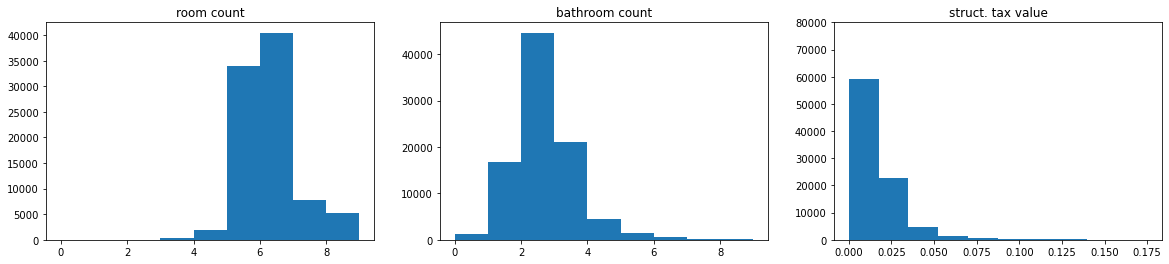

In [124]:

#data is cleaned
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.hist(imputed_trainx.roomcnt.values, bins= [
    x for x in range(10)
])
plt.title("room count")
plt.subplot(1,3,2)
plt.hist(imputed_trainx.bathroomcnt.values,bins = [
    x for x in range(10)
])
plt.title("bathroom count")
plt.subplot(1,3,3)
plt.hist(imputed_trainx.structuretaxvaluedollarcnt/max(imputed_trainx.structuretaxvaluedollarcnt),range = [0,0.175])
plt.ylim((0,80000))
plt.title("struct. tax value")
plt.show()
#we can see that counts of rooms and bathrooms have different distribution.
#Most houses have only 1 room, taking up nearly 80-90%
#the bathroom distributes in a normal way
# structure taxt value counts distributed in a poisson way.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegressionCV, LinearRegression,LassoCV

from sklearn.metrics import mean_absolute_error,mean_squared_error
model_y = imputed_trainx['logerror']
model_x = imputed_trainx.drop(columns = ['logerror'])
trainx,testx,trainy,testy = train_test_split(model_x,model_y,test_size=0.49, random_state=135)
# 1. Linear regression using LASSO to deal with sparse coefficients
LinearReg = LassoCV(n_alphas=100, cv = 10)
LinearReg.fit(trainx, trainy)
predy_lr = LinearReg.predict(testx)
print(mean_absolute_error(predy_lr,testy))

0.06820255043862221


In [130]:
#decision tree model using GridSearchCV
from sklearn.model_selection import GridSearchCV

DecisionTree = DecisionTreeRegressor(random_state=111,max_leaf_nodes=80000)
DecisionTree.fit(trainx,trainy)
predy_dt = DecisionTree.predict(testx)
print(DecisionTree.get_depth())
print(mean_absolute_error(predy_dt,testy))

#reduce depth leads to less error maybe due to reduction of overfitting
DecisionTree = DecisionTreeRegressor(max_leaf_nodes=80000)
grid= GridSearchCV(DecisionTree,param_grid={"max_depth":[10,20,30],"max_features":[6,8,10,12]})


grid.fit(trainx,trainy)
predy_dt = grid.predict(testx)
# print(grid.cv_results_)
print(grid.best_params_)
print(mean_absolute_error(predy_dt,testy))
#setting smaller depths and number of features leads to better prediction

78
0.11438610225688556
{'max_depth': 10, 'max_features': 8}
0.06949790255493354


In [116]:
#Randon Forest Model
#Learning from the previous decision tree model
from sklearn.ensemble import RandomForestRegressor
RFM = RandomForestRegressor( max_depth=10,max_features=6)
RFM.fit(trainx, trainy)
predy_rfm = RFM.predict(testx)
print(mean_absolute_error(predy_rfm,testy))

0.06844918537616199


In [131]:
#save the model
import joblib
joblib.dump(LinearReg,'./zillow.model.pkl')

['./zillow.model.pkl']